# ***Mini-project scraping: Avito.ma***



Réalisé par : ***KOUHOU Mohamed*** - Data Engineer, INE1

***Plan :***


1.   Scraping
2.   Étude statistiques des annonces
      *   Étude par catégorie
      *   Étude par ville
      *   Étude par annonceur
      *   Évolution temporelle















Dans ce projet, nous allons utiliser ***requests*** pour récupérer les pages web dont on va ensuite extraire les informations utiles à l'aide de ***BeautifulSoup***.


> *NB* : Avant de commencer, on doit d'abord choisir le nombre de page à scraper par catégorie et le mettre dans la variable ***nbr_pg_par_categ***.



## ***Scraping***

In [0]:
from requests import get
from bs4 import BeautifulSoup
import requests
import numpy as np


url_categ = ['https://www.avito.ma/fr/maroc/t%C3%A9l%C3%A9phones-%C3%A0_vendre','https://www.avito.ma/fr/maroc/tablettes-%C3%A0_vendre','https://www.avito.ma/fr/maroc/ordinateurs_portables-%C3%A0_vendre','https://www.avito.ma/fr/maroc/ordinateurs_bureau-%C3%A0_vendre','https://www.avito.ma/fr/maroc/accessoires_informatique_et_gadgets-%C3%A0_vendre','https://www.avito.ma/fr/maroc/jeux_vid%C3%A9o_et_consoles-%C3%A0_vendre','https://www.avito.ma/fr/maroc/appareils_photo_cameras-%C3%A0_vendre','https://www.avito.ma/fr/maroc/t%C3%A9l%C3%A9visions-%C3%A0_vendre','https://www.avito.ma/fr/maroc/image_et_son-%C3%A0_vendre',
             'https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre','https://www.avito.ma/fr/maroc/motos-%C3%A0_vendre','https://www.avito.ma/fr/maroc/v%C3%A9los-%C3%A0_vendre','https://www.avito.ma/fr/maroc/v%C3%A9hicules_professionnels-%C3%A0_vendre','https://www.avito.ma/fr/maroc/bateaux-%C3%A0_vendre','https://www.avito.ma/fr/maroc/pi%C3%A8ces_et_accessoires_v%C3%A9hicules-%C3%A0_vendre','https://www.avito.ma/fr/maroc/appartements','https://www.avito.ma/fr/maroc/maisons_et_villas','https://www.avito.ma/fr/maroc/bureaux_et_plateaux','https://www.avito.ma/fr/maroc/magasins_et_commerces','https://www.avito.ma/fr/maroc/terrains_et_fermes','https://www.avito.ma/fr/maroc/locations_de_vacances',
             'https://www.avito.ma/fr/maroc/colocations','https://www.avito.ma/fr/maroc/electorm%C3%A9nager_et_vaisselle-%C3%A0_vendre','https://www.avito.ma/fr/maroc/meubles_et_d%C3%A9coration-%C3%A0_vendre','https://www.avito.ma/fr/maroc/jardin_et_outils_de_bricolage-%C3%A0_vendre','https://www.avito.ma/fr/maroc/vetements-%C3%A0_vendre','https://www.avito.ma/fr/maroc/chaussures-%C3%A0_vendre','https://www.avito.ma/fr/maroc/sacs_et_accessoires-%C3%A0_vendre','https://www.avito.ma/fr/maroc/vetements_pour_enfant-%C3%A0_vendre','https://www.avito.ma/fr/maroc/equipements_pour_enfant-%C3%A0_vendre','https://www.avito.ma/fr/maroc/produits_de_beaute-%C3%A0_vendre','https://www.avito.ma/fr/maroc/sports_et_loisirs-%C3%A0_vendre',
             'https://www.avito.ma/fr/maroc/animaux-%C3%A0_vendre','https://www.avito.ma/fr/maroc/instruments_de_musique-%C3%A0_vendre','https://www.avito.ma/fr/maroc/art_et_collections-%C3%A0_vendre','https://www.avito.ma/fr/maroc/voyage_et_billetterie-%C3%A0_vendre','https://www.avito.ma/fr/maroc/films_livres_magazines-%C3%A0_vendre']
    
def get_urls(n):
    urls=[]
    for url in url_categ:
      for i in range(1,n+1):
          var_url=[url+'?o={}'.format(i)]
          urls=urls+var_url
    return urls
        
nbr_pg_par_categ=1       #nombre de pages par categorie
annonces=[]               #liste des annonces
num_annonce=0             #numero de l'annonce dans la meme categorie
num_page=1                #numero de la page courante

URLS=get_urls(nbr_pg_par_categ)
for url in URLS:
    print("Extraction page ", num_page, "/", nbr_pg_par_categ*len(url_categ), " : ", url)
    resp=requests.get(url)
    html_soup=BeautifulSoup(resp.text,'html.parser')
    vue=html_soup.find('div',class_="listing listing-thumbs")
    
    for i in range(num_annonce+1,num_annonce+35):
        li_item="li-item-{} ".format(i)
        element=vue.find('div',id=li_item).find('div',class_="ctext3 fs12").find('h2',class_="fs14").find('a',href=True)
        url_annonce=element.get('href')
        titre=element.text
        titre=titre.replace("\n","")
        #On a accédé à la page de l'annonce
        try:
            rep=requests.get(url_annonce)
            #Extraction du nombre de vues
            try:
                html_soup1=BeautifulSoup(rep.text,'html.parser')
                vue1=html_soup1.find('div',class_="panel-heading panel-heading-small").text
                str1=vue1
                v=[int(s) for s in str1.split() if s.isdigit()]
                nb_vues=v[0]
            except:
                nb_vues=np.nan
                
            #prix
            try:
                prix=html_soup1.find('span',class_="amount value").text
                prix=prix.replace(" ","")
                str1=prix
                pr=[int(s) for s in str1.split() if s.isdigit()]
            except:
                pr=[np.nan]
            
            #ville
            try:
                html_sam=BeautifulSoup(rep.text,'html.parser')
                vuesam=html_sam.find('div',class_="panel-body list-big list-big-icons panel-body-smallpadding")
                vuesam=vuesam.find('h2',class_="font-normal fs13 lh30 no-margin").text
                ville=vuesam
            except:
                ville=np.nan
           
            #nom de l'annonceur
            try:
                html_sam=BeautifulSoup(rep.text,'html.parser')
                vuesam=html_sam.find('div',class_="panel-footer")
                vuesam=vuesam.find('span',class_="").text
                nom_annonceur=vuesam
            except:
                nom_annonceur=np.nan

            #description    
            try:
                html_sam=BeautifulSoup(rep.text,'html.parser')
                vuesam=html_sam.find('div',class_="row-fluid")
                vuesam=vuesam.find('div',class_="span10").text
                desc=vuesam
                desc=desc.replace("\n","")
            except:
                desc=np.nan
            
            #telephone, date, categorie
            try:
              html_sam=BeautifulSoup(rep.text,'html.parser')
              scripts=html_sam.find_all('script')
              for script in scripts:
                if "telephone:" in script.text:
                  i = script.text.index("telephone:")
                  tel = script.text[i+12:i+22]
                if "'PublishDate'  :" in script.text:
                  j = script.text.index("'PublishDate'  :")
                  date = script.text[j+18:j+28]
                if "'SubCategory'  :" in script.text:
                  k = script.text.index("'SubCategory'  :")
                  text = script.text[k+17:k+100]
                  categ = text[text.find(' "')+2:text.find('" ')]
            except:
              tel=np.nan
              date=np.nan
              categ=np.nan

        except:
            print("ERREUR lors de l'extraction de la page ", num_page)
        annonces=annonces+[[titre, pr[0], nb_vues, url_annonce, ville, nom_annonceur, desc, categ, tel, date]]
    num_annonce=num_annonce+35
    num_page=num_page+1
    if num_annonce == nbr_pg_par_categ*35: num_annonce=0
print("********FIN***********")
    


Transformons maintenant la liste ***annonces***, qui contient les annonces récupérées, en DataFrame et stockons-le dans un fichier ***annonces_avito.csv***.

In [0]:
import pandas as pd
data = pd.DataFrame(annonces, columns=["Titre","Prix","Nombre de vues","URL","Ville","Annonceur","Description", "Catégorie", "Téléphone", "Date"])
data.to_csv('annonces_avito.csv', index=False)


# ***Étude statistique des annonces***

Le fichier ***annonces_avito.csv*** est composé de de **12580 lignes** et **10 colonnes**. Chaque ligne correspond à une annonce. Les colonnes sont :


1.   Titre : titre de l'annonce
2.   Prix : réel positif
3.   Nombre de vue : combien de fois le lien de l'annonce a été consulté (entier positif)
4.   URL : URL de l'annonce
5.   Ville : ville de l'annonceur
6.   Annonceur : nom de l'annonceur
7.   Description : texte descriptif de l'annonce
8.   Catégorie
9.   Téléphone : numéro de téléphone de l'annonceur
10.  Date : date où l'annonce a été mise en ligne



### ***Importation des modules et du fichier de données***

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("annonces_avito.csv")
df = pd.DataFrame(data)

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt

### ***Apérçu sur le fichier***

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 12579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12578 non-null  int64  
 1   Titre           12578 non-null  object 
 2   Prix            9913 non-null   float64
 3   Nombre de vues  12578 non-null  int64  
 4   URL             12578 non-null  object 
 5   Ville           12578 non-null  object 
 6   Annonceur       12578 non-null  object 
 7   Description     12578 non-null  object 
 8   Catégorie       12578 non-null  object 
 9   Téléphone       12578 non-null  int64  
 10  Date            12578 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [0]:
df.head()

## ***Étude globale***

***Nombre total d'annonces***

le nombre des annonces correspond au nombre des lignes

In [16]:
len(df.index)

12580

***Nombre de villes***

In [17]:
df["Ville"].nunique()

194

***Nombre de catégories***

In [21]:
df["Catégorie"].nunique()

42

***Nombre total de vues***

In [23]:
df["Nombre de vues"].sum()

13

***Moyenne de prix sur tous les items***

Créons d'abord un DataFrame contenent uniquement les annonces dont les prix sont données (élimination des valeurs nulles)

In [209]:
prixNonNul = df[np.isfinite(df["Prix"])]
prixNonNul

,Unnamed: 0,Titre,Prix,Nombre de vues,URL,Ville,Annonceur,Description,Catégorie,Téléphone,Date
0,0,iphone 11 neuf red product 64Go...,8200.0,7,https://www.avito.ma/fr/casablanca/téléphones/...,Casablanca,AliGsm,je mets en vente l'iPhone 11 neuf red product ...,Téléphones,619121211,2020-05-06
1,1,iphone 11 noir neuf 64Go,8200.0,6,https://www.avito.ma/fr/casablanca/téléphones/...,Casablanca,AliGsm,je mets en vente l'iPhone 11 noir 64Go..neuf.....,Téléphones,619121211,2020-05-06
2,2,Huawei P20 pro Twilight en excellent état,2700.0,27,https://www.avito.ma/fr/casablanca/téléphones/...,Casablanca,AliGsm,je mets en vente le Huawei P20 pro Twilight en...,Téléphones,619121211,2020-05-06
3,3,Telephone,1200.0,19,https://www.avito.ma/fr/casablanca/téléphones/...,Casablanca,Mohamed CHLIGUI,je mets en vente un smartphone VIVO Y91C 32 GO...,Téléphones,622984620,2020-05-06
4,4,oneplus 7 pro 256Go,5000.0,21,https://www.avito.ma/fr/casablanca/téléphones/...,Casablanca,AliGsm,je mets en vente le oneplus 7 pro 256Go comme ...,Téléphones,619121211,2020-05-06
...,...,...,...,...,...,...,...,...,...,...,...
12574,12574,كتب s2,220.0,135,https://www.avito.ma/fr/tanger/films_livres_ma...,Tanger,abs,ktouba s2 faculte abdelmalek saadi bnas taman,"Films, Livres, Magazines",619038386,2020-02-17
12576,12576,كتاب العادات السبع للناس الأكثر فعالية,79.0,80,https://www.avito.ma/fr/centre/films_livres_ma...,El Jadida,me,كتاب العادات السبع للناس الأكثر فعاليةالتوصيل ...,"Films, Livres, Magazines",634491493,2020-02-17
12577,12577,كتاب فن اللامبالاة لعيش حياة تخالف المألوف,79.0,82,https://www.avito.ma/fr/centre/films_livres_ma...,El Jadida,me,كتاب فن اللامبالاة : لعيش حياة تخالف المألوفال...,"Films, Livres, Magazines",634491493,2020-02-17
12578,12578,أغنى رجل في بابيل - richest man in babylon,79.0,51,https://www.avito.ma/fr/centre/films_livres_ma...,El Jadida,me,أغنى رجل في بابيل - richest man in babylonالتو...,"Films, Livres, Magazines",634491493,2020-02-17


In [210]:
prixNonNul["Prix"].mean()

403234.71981845686

On constate que cette valeur est un peu irraisonable. Cherchons l'annonce dont le prix a causé cette hausse de la moyenne et éliminons-la.

In [54]:
df.nlargest(5, ['Prix'])       #les 5 plus hauts prix

,Unnamed: 0,Titre,Prix,Nombre de vues,URL,Ville,Annonceur,Description,Catégorie,Téléphone,Date
9279,9279,Sacs authentiques,999999999.0,92,https://www.avito.ma/fr/al_qods/sacs_et_access...,Casablanca,Abdel Sadouki,Je mets en vente des sacs authentiques Louis V...,Sacs et Accessoires,626459653,2020-05-01
11933,11933,للسفر والسياحة,603715359.0,66,https://www.avito.ma/fr/rabat/voyage_et_billet...,Rabat,Hsina Mansouri,توصيل إلى جميع المدن والمطارات,Voyages et Billetterie,603715359,2020-03-11
6643,6643,Terrain Proche de Hôtel Hilton Plus 24 Étages,416000000.0,54,https://www.avito.ma/fr/malabata/terrains_et_f...,Tanger,Agence Immobilière MILAN,"Bonjour tout le monde ,********Fabuleuse oppor...",Terrains et Fermes,666755727,2020-05-05
6464,6464,مزرعة كبيرة 260 هكتار في مكناس,260000000.0,21,https://www.avito.ma/fr/rabat/terrains_et_ferm...,Rabat,fahd,grande ferme à meknessuperficie de 260 hectare...,0,771376644,2020-05-06
6645,6645,Terrain Avec Plan Autorisé d'un Immeuble à Mar...,196000000.0,25,https://www.avito.ma/fr/marjane/terrains_et_fe...,Tanger,Agence Immobilière MILAN,"Salut à tous et bienvenue ,......................",Terrains et Fermes,666755727,2020-05-05


Dans les lignes d'indice 9279 et 11933, les annonceurs semblent donner des prix exagérés à leurs produits si l'on prend en considération leurs types, alors que les 3 autres semblent raisonable (il s'agit de produits immobiliers). 

Éliminons les deux lignes :

In [0]:
df = df.drop([9279, 11933])

In [212]:
df.nlargest(5, ['Prix'])

,Unnamed: 0,Titre,Prix,Nombre de vues,URL,Ville,Annonceur,Description,Catégorie,Téléphone,Date
6643,6643,Terrain Proche de Hôtel Hilton Plus 24 Étages,416000000.0,54,https://www.avito.ma/fr/malabata/terrains_et_f...,Tanger,Agence Immobilière MILAN,"Bonjour tout le monde ,********Fabuleuse oppor...",Terrains et Fermes,666755727,2020-05-05
6464,6464,مزرعة كبيرة 260 هكتار في مكناس,260000000.0,21,https://www.avito.ma/fr/rabat/terrains_et_ferm...,Rabat,fahd,grande ferme à meknessuperficie de 260 hectare...,0,771376644,2020-05-06
6645,6645,Terrain Avec Plan Autorisé d'un Immeuble à Mar...,196000000.0,25,https://www.avito.ma/fr/marjane/terrains_et_fe...,Tanger,Agence Immobilière MILAN,"Salut à tous et bienvenue ,......................",Terrains et Fermes,666755727,2020-05-05
5762,5762,منزل,110000000.0,154,https://www.avito.ma/fr/oued_zem/maisons_et_vi...,Oued Zem,youness youness,منزل للبيع غير مخفض Salons : 2 Salles de bain...,0,676022610,2020-05-03
6635,6635,Terrain Titré 15000 m2 Avenue Moulay Rachid,75000000.0,29,https://www.avito.ma/fr/tanger/terrains_et_fer...,Tanger,Agence Immobilière MILAN,Bonjour madame et monsieur Caractéristiques de...,Terrains et Fermes,679378089,2020-05-05


Maintenant reprenons notre étude.

***Moyenne des prix***

In [213]:
prixNonNul = df[np.isfinite(df["Prix"])]
prixNonNul["Prix"].mean()

241537.06133360235

***Période temporelle couverte par l'étude***

In [214]:
plus_recente = df["Date"].max()
plus_ancienne = df["Date"].min()

print("L'annonce la plus récente a été publiée le : ", plus_recente,
      "\nL'annonce la plus ancienne a été publiée le : ", plus_ancienne)

L'annonce la plus récente a été publiée le :  2020-05-06 
L'annonce la plus ancienne a été publiée le :  2019-12-29


***Produit consulté le plus de fois***

In [334]:
df7 = df.sort_values(by=["Nombre de vues"], ascending=False)
df7.iloc[0,:]

Unnamed: 0                                                     2836
Titre                                   Ecouteurs Samsung d'Origine
Prix                                                            NaN
Nombre de vues                                                59015
URL               https://www.avito.ma/fr/2_mars/image_et_son/Ec...
Ville                                                    Casablanca
Annonceur                                                    Dounia
Description                             Ecouteurs samsung d'origine
Catégorie                                               Image & Son
Téléphone                                                 770809010
Date                                                     2020-05-05
Name: 2836, dtype: object

## ***Étude par ville***

***Nombre d'annonces par ville***

In [215]:
df1 = df.groupby(['Ville'])[['Titre']].nunique().rename(columns={"Titre": "Nombre d'annonces"})
df1

,Nombre d'annonces
Ville,
Aarab Sebbah Gheris,3
Aarab Sebbah Ziz,1
Abadou,1
Abaynou,1
Abdelghaya Souahel,1
...,...
Zagora,2
Zaida,1
Zaïo,1


***Top 5 villes en nombre d'annonces***

In [216]:
df2 = df1.nlargest(5, ["Nombre d'annonces"])
df2

,Nombre d'annonces
Ville,
Casablanca,3986
Rabat,1210
Marrakech,911
Tanger,805
Fès,541


## ***Étude par Catégorie***

***Nombre d'annones par catégorie***

In [336]:
df.groupby(["Catégorie"])[["Titre"]].count()


,Titre
Catégorie,
0,1190
Accessoires informatique et Gadgets,340
Animaux,340
Appareils photo et Caméras,340
Appartements,194
Art et Collections,340
Autres,29
Bateaux,340
Bureaux et Plateaux,191


Text(0.5, 1.0, "Nombre d'annonces par catégorie")

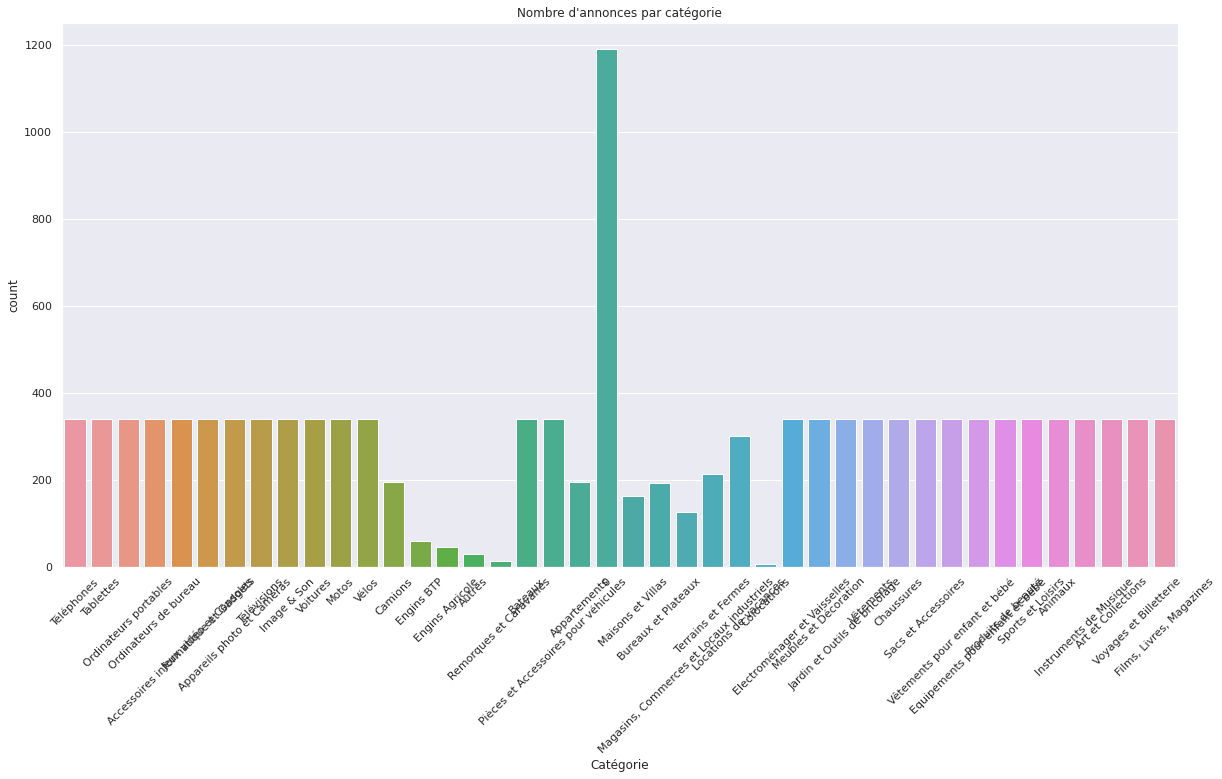

In [337]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plot1 = sns.countplot(x='Catégorie', data=df)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plt.title("Nombre d'annonces par catégorie")

***Plus cher/moins cher item par catégorie***

In [219]:
#Plus cher
pc = df.groupby(["Catégorie"])[["Prix"]].max().sort_values(by=["Prix"])
pc

,Prix
Catégorie,
Produits de beauté,2500.0
Sacs et Accessoires,4444.0
Locations de vacances,6000.0
Vêtements,7000.0
Colocations,7000.0
Jeux vidéo et Consoles,8000.0
Equipements pour enfant et bébé,9500.0
Meubles et Décoration,10000.0
Téléphones,15000.0


In [271]:
#Moins cher
mc = df.groupby("Catégorie")[["Prix"]].min().sort_values(by=["Prix"])
mc[:10]

,Prix
Catégorie,
Vêtements pour enfant et bébé,1.0
Voyages et Billetterie,1.0
Animaux,1.0
Télévisions,1.0
"Films, Livres, Magazines",1.0
Equipements pour enfant et bébé,1.0
Sacs et Accessoires,3.0
Jardin et Outils de bricolage,5.0
Chaussures,5.0


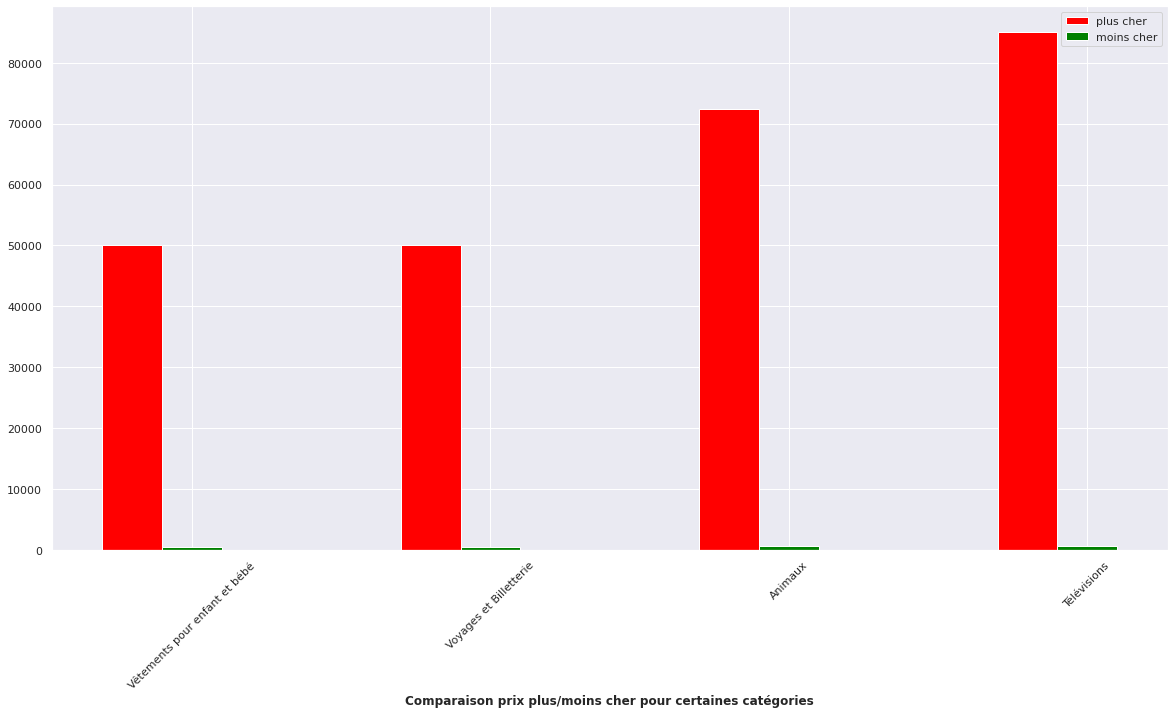

In [229]:
plt.figure(figsize=(20, 10))
barWidth = 0.2

plus_cher = [a for a in pc["Prix"][21:25]]
moins_cher = [a*10 for a in mc["Prix"][21:25]]
 
r1 = np.arange(len(plus_cher))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, plus_cher, color='red', width=barWidth, edgecolor='white', label='plus cher')
plt.bar(r2, moins_cher, color='green', width=barWidth, edgecolor='white', label='moins cher')
 
plt.xlabel('Comparaison prix plus/moins cher pour certaines catégories', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(plus_cher))], [c for c in mc.index], rotation=45)
 
plt.legend()


***Moyenne prix par catégorie***

In [270]:
moy = df.groupby(["Catégorie"])[["Prix"]].mean().sort_values(by=["Prix"])
moy[:10]

,Prix
Catégorie,
Produits de beauté,296.531847
Vêtements,304.016502
Sacs et Accessoires,440.433898
Locations de vacances,504.721239
"Films, Livres, Magazines",612.827957
Chaussures,718.264026
Accessoires informatique et Gadgets,836.700348
Equipements pour enfant et bébé,1042.533123
Sports et Loisirs,1073.365132


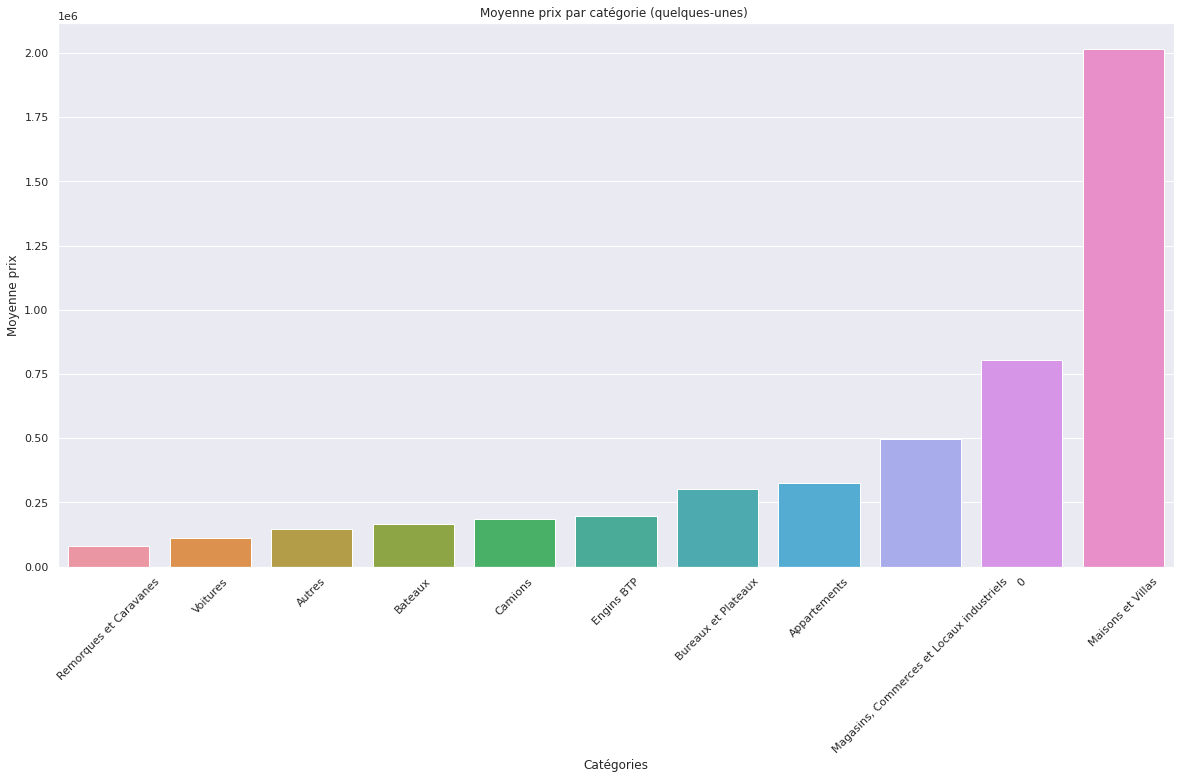

In [264]:
plt.figure(figsize=(20, 10))

x =[cat for cat in moy.index[30:-1]]

y =[m for m in moy["Prix"][30:-1]] 
  
ax = sns.barplot(x, y); 
  
ax.set(xlabel ='Catégories', ylabel ='Moyenne prix') 

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  
plt.title('Moyenne prix par catégorie (quelques-unes) ')

***Nombre de vues par catégorie***

In [268]:

vues_categ = df.groupby(["Catégorie"])[["Nombre de vues"]].sum().sort_values("Nombre de vues", ascending=False)
vues_categ[:10]

,Nombre de vues
Catégorie,
Voitures,721959
0,474155
Meubles et Décoration,413117
Bateaux,362497
Motos,345933
Locations de vacances,306211
Camions,261896
Terrains et Fermes,246341
Pièces et Accessoires pour véhicules,241608


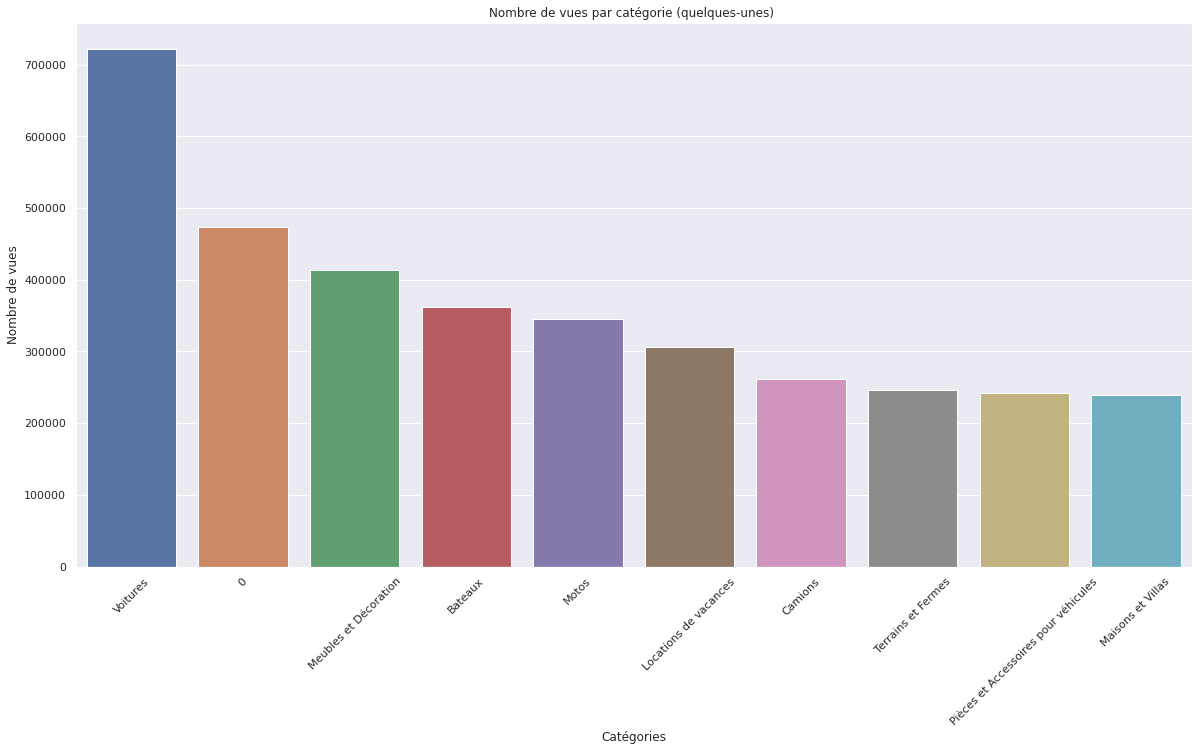

In [269]:
plt.figure(figsize=(20, 10))

x =[cat for cat in vues_categ.index[:10]]

y =[n for n in vues_categ["Nombre de vues"][:10]] 
  
ax = sns.barplot(x, y); 
  
ax.set(xlabel ='Catégories', ylabel ='Nombre de vues') 

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  
plt.title('Nombre de vues par catégorie (quelques-unes) ');

## ***Étude par ville***

***Nombre d'annonce par ville***


In [338]:
nbAnnoncesVille = df.groupby(["Ville"])[["Titre"]].count().sort_values("Titre", ascending=False)
nbAnnoncesVille[:5]


,Titre
Ville,
Casablanca,4240
Rabat,1265
Marrakech,965
Tanger,840
Fès,558


Text(0.5, 1.0, "Nombre d'annonce par catégorie (quelques-unes) ")

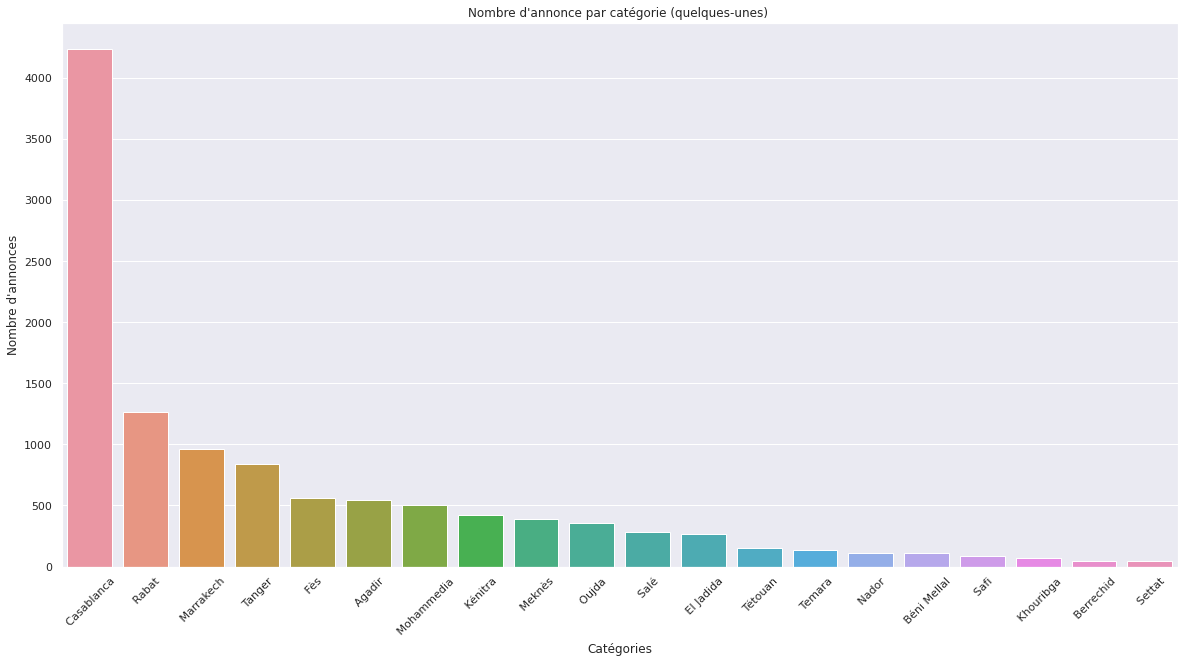

In [339]:
plt.figure(figsize=(20, 10))
x =[cat for cat in nbAnnoncesVille.index[:20]]
y =[m for m in nbAnnoncesVille["Titre"][:20]] 
ax = sns.barplot(x, y)
ax.set(xlabel ='Catégories', ylabel ="Nombre d'annonces")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Nombre d'annonce par catégorie (quelques-unes) ")

***Prix plus/moins cher par ville***

In [296]:
maxPrix = prixNonNul.groupby(["Ville"])[["Prix"]].max()
maxPrix[:5]

,Prix
Ville,
Aarab Sebbah Gheris,140000.0
Aarab Sebbah Ziz,400.0
Abaynou,1300.0
Abdelghaya Souahel,1300.0
Adar,40000.0


In [297]:
minPrix = prixNonNul.groupby(["Ville"])[["Prix"]].min()
minPrix[:5]

,Prix
Ville,
Aarab Sebbah Gheris,30000.0
Aarab Sebbah Ziz,400.0
Abaynou,1300.0
Abdelghaya Souahel,1300.0
Adar,1300.0


***Moyenne prix par ville***

In [307]:
moy_prix = prixNonNul.groupby(["Ville"])[["Prix"]].mean().sort_values("Prix", ascending=False)
moy_prix[:5]

,Prix
Ville,
Tata,2.000000e+07
Oued Zem,8.488294e+06
Guenfouda,1.800000e+06
Bir Jdid,1.678409e+06
Cabo Negro,1.650813e+06


Text(0.5, 1.0, 'Moyenne prix par ville (quelques-unes) ')

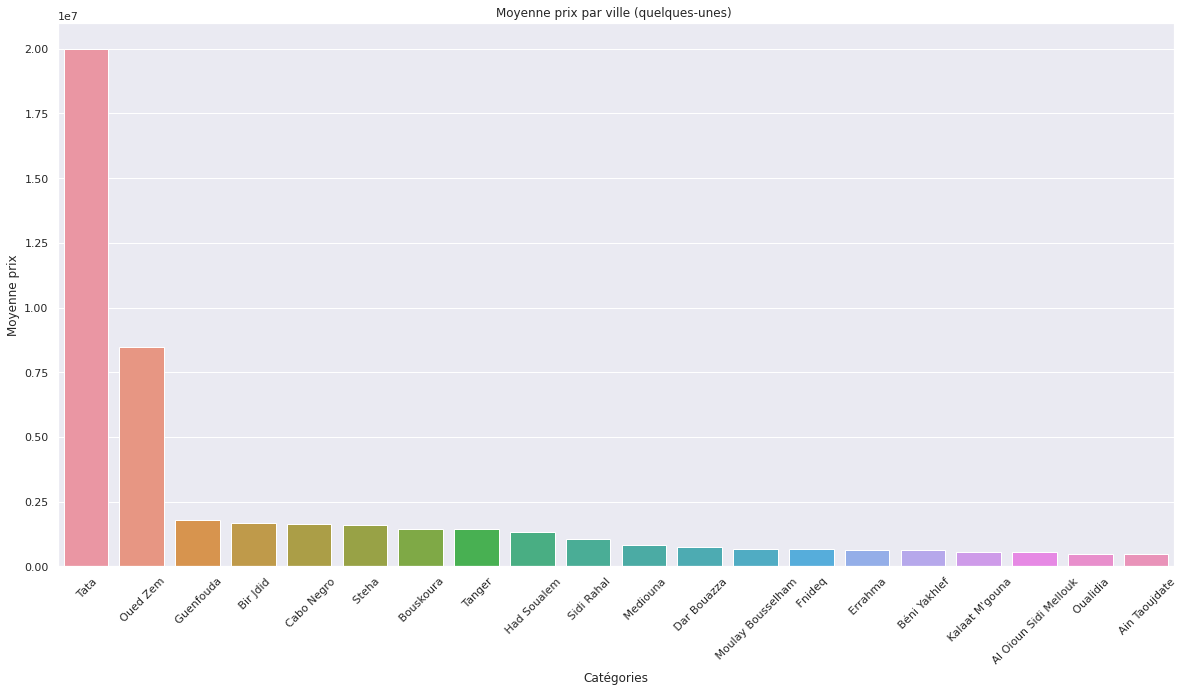

In [315]:
plt.figure(figsize=(20, 10))
x =[cat for cat in moy_prix.index[:20]]
y =[m for m in moy_prix["Prix"][:20]] 
ax = sns.barplot(x, y)
ax.set(xlabel ='Villes', ylabel ="Moyenne prix")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Moyenne prix par ville (quelques-unes) ")

***Nombre de vues par ville***

In [318]:
vuesVille = df.groupby(["Ville"])[["Nombre de vues"]].sum().sort_values("Nombre de vues", ascending=False)
vuesVille[:5]

,Nombre de vues
Ville,
Casablanca,2926207
Tanger,438769
Rabat,433033
Marrakech,379436
Fès,300805


Text(0.5, 1.0, 'Nombre de vues par ville (quelques-unes) ')

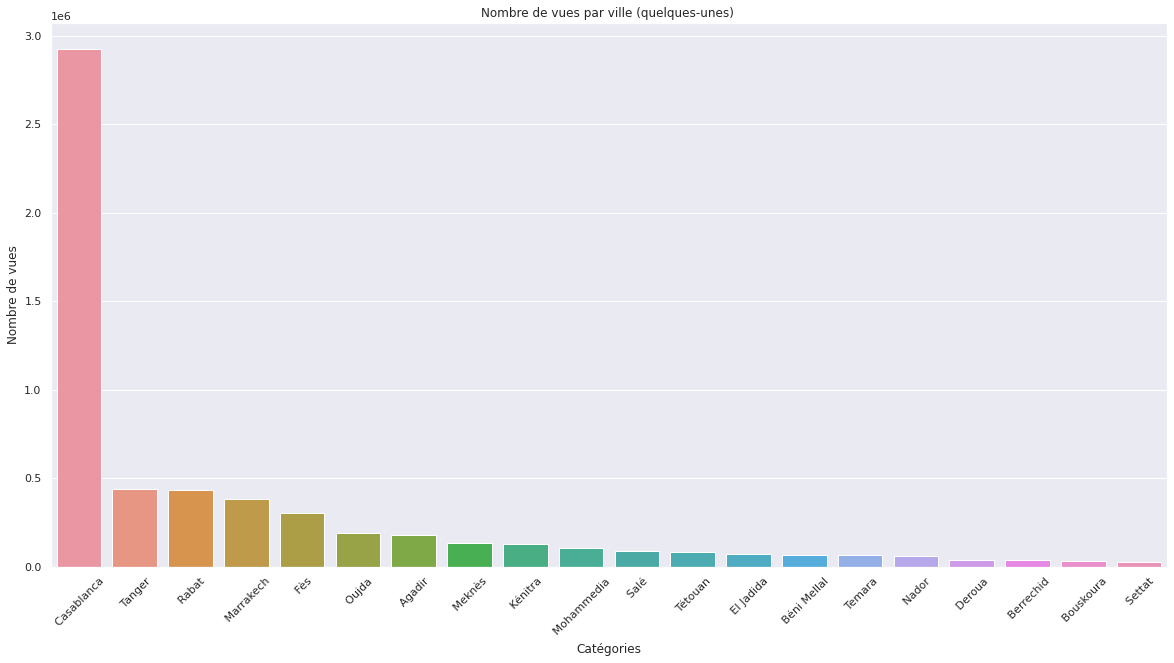

In [319]:
plt.figure(figsize=(20, 10))
x =[cat for cat in vuesVille.index[:20]]
y =[v for v in vuesVille["Nombre de vues"][:20]] 
ax = sns.barplot(x, y)
ax.set(xlabel ='Villes', ylabel ="Nombre de vues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Nombre de vues par ville (quelques-unes) ")

## ***Étude par annonceur***

***Nombre d'annonces par annonceur***

**NB** : on suppose que les noms des annonceurs sont uniques.

In [341]:
ann = df.groupby(["Annonceur"])[["Titre"]].count().sort_values("Titre", ascending=False)
ann[:5]

,Titre
Annonceur,
electro saymo,431
Verre Deau,258
mohamed,139
ORIVORA,134
Allal Med,117


Text(0.5, 1.0, "Nombre d'annonce par annonceur (quelques-uns) ")

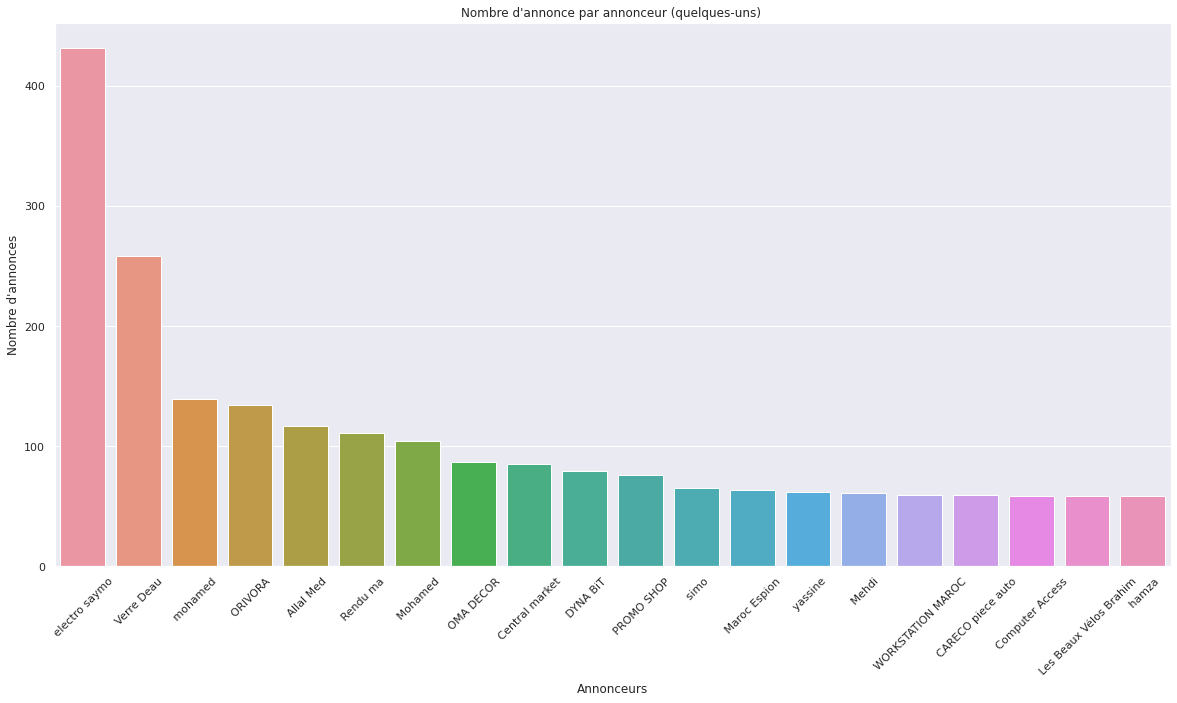

In [342]:
plt.figure(figsize=(20, 10))
x =[cat for cat in ann.index[:20]]
y =[a for a in ann["Titre"][:20]] 
ax = sns.barplot(x, y)
ax.set(xlabel ='Annonceurs', ylabel ="Nombre d'annonces")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Nombre d'annonce par annonceur (quelques-uns) ")

***Annonceurs dont les annonces ont le plus grand nombre de vues***

In [343]:
vue_ann = df.groupby(["Annonceur"])[["Nombre de vues"]].sum().sort_values("Nombre de vues", ascending=False)
vue_ann[:5]

,Nombre de vues
Annonceur,
Animal King,136462
Abdo Deco,118782
Coline Car,99255
Vintage Room,91028
Auto Power,86207


Text(0.5, 1.0, 'Top 10 annonceurs en nombre de vues ')

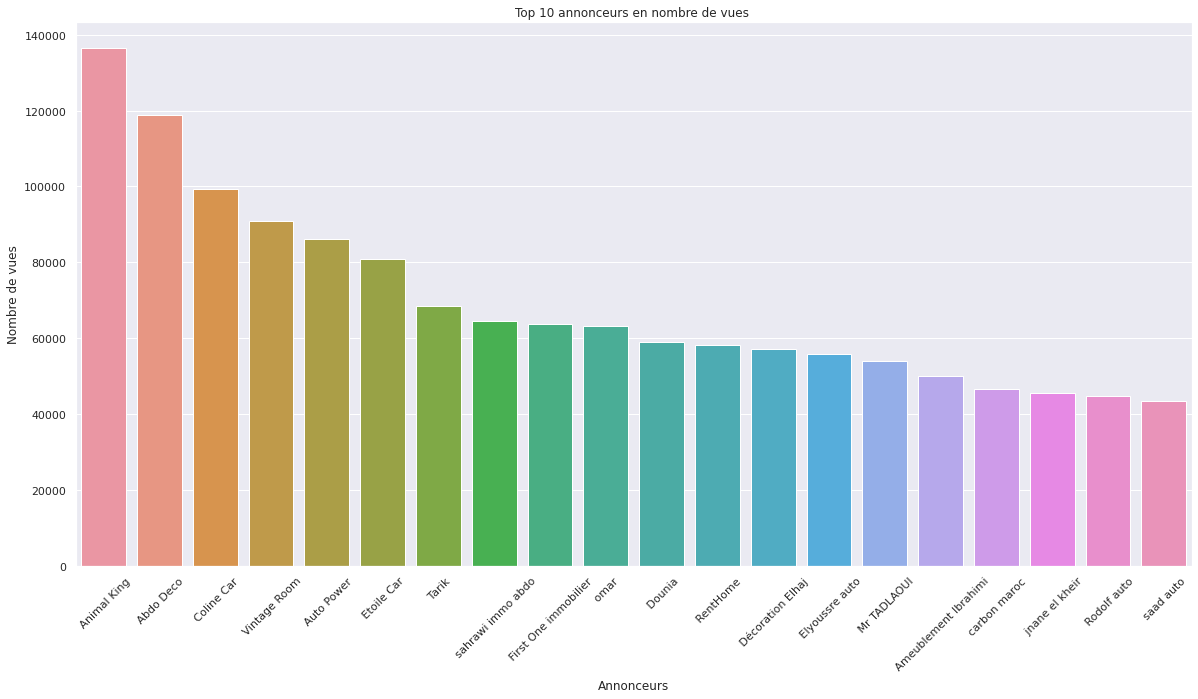

In [381]:
plt.figure(figsize=(20, 10))
x =[cat for cat in vue_ann.index[:20]]
y =[v for v in vue_ann["Nombre de vues"][:20]] 
ax = sns.barplot(x, y)
ax.set(xlabel ='Annonceurs', ylabel ="Nombre de vues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Top 10 annonceurs en nombre de vues ")

## ***Évolution temporelle***

***Nombre d'annonces par jour***

In [356]:
ann_jour = df.groupby(["Date"])[["Titre"]].count().sort_values("Titre", ascending=False)
ann_jour[:5]

,Titre
Date,
2020-05-05,6263
2020-05-04,1069
2020-05-06,981
2020-05-03,559
2020-05-02,378


***Évolution de la moyenne des prix de l'immobilier***

In [395]:
imm = prixNonNul[(prixNonNul["Catégorie"]=="Appartements") | (df["Catégorie"]=="Magasins, Commerces et Locaux industriels") | (df["Catégorie"]=="Bureaux et Plateaux") |(df["Catégorie"]=="Maisons et Villas") |(df["Catégorie"]=="Terrains et Fermes")]
moyenne_prix_jour = imm.groupby(["Date"])[["Prix"]].mean()
moyenne_prix_jour.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Prix
Date,
2020-03-29,45300.0
2020-03-30,5000.0
2020-03-31,4500.0
2020-04-01,462800.0
2020-04-02,8000.0


In [0]:
jours = pd.DataFrame({"Jour":moyenne_prix_jour.index.T},
                     index=moyenne_prix_jour.index)
evolution = pd.concat([jours, moyenne_prix_jour], axis=1, sort=False)
evolution

<Figure size 7200x7200 with 0 Axes>

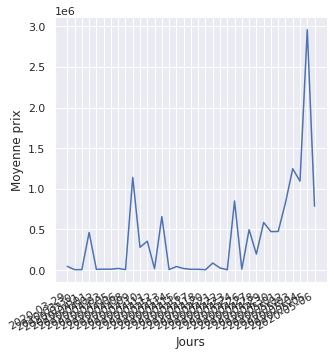

In [404]:
plt.figure(figsize=(100, 100))
g = sns.relplot(x="Jour", y="Prix", kind="line", data=evolution)
g.set(xlabel ='Jours', ylabel ="Moyenne prix")
g.fig.autofmt_xdate()
